# Multiple Linear Regression Model

In [1]:
#=============================================================================================
# CODE NAME     : Multiple Linear Regression Model.py
# PURPOSE       : Demonstrate application of regression analysis using Pandas and statsmodels 
# APPLICATION   : Analyzing Fitness dataset
#==============================================================================================

In [1]:
# Load Input data
import numpy as np
import pandas as pd

fitness = pd.read_excel("C:\\Users\\Training\\Data Science using SAS and Python\\Data\\fitness.xlsx")
fitness.head()

,Name,Gender,RunTime,Age,Weight,Oxygen_Consumption,Run_Pulse,Rest_Pulse,Maximum_Pulse,Performance
0,Donna,F,8.17,42,68.15,59.57,166,40,172,90
1,Gracie,F,8.63,38,81.87,60.06,170,48,186,94
2,Luanne,F,8.65,43,85.84,54.30,156,45,168,83
3,Mimi,F,8.92,50,70.87,54.63,146,48,155,67
4,Chris,M,8.95,49,81.42,49.16,180,44,185,72


# Fit Multiple Linear Regression Model

In [2]:
from statsmodels.formula.api import ols
model = ols('Oxygen_Consumption ~ Performance + RunTime', data = fitness).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Oxygen_Consumption   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     44.09
Date:                Sat, 04 Sep 2021   Prob (F-statistic):           2.23e-09
Time:                        20:34:02   Log-Likelihood:                -73.284
No. Observations:                  31   AIC:                             152.6
Df Residuals:                      28   BIC:                             156.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      71.5263      8.935      8.005      0.000      53.223      89.829
Performance     0.0636      0.047      1.348      0.188      -0.033       0.160
RunTime        -2.6216      0.623     -4.207      0.000      -3.898      -1.345
==============================================================================
Omnibus:                        0.195   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.382
Skew:                          -0.130   Prob(JB):                        0.826
Kurtosis:                       2.523   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
model.params 
from statsmodels.tools.eval_measures import mse

# Variable Selection by using Rsquare, Adjrsq and Cp 

In [4]:
def get_all_possible_reg(data,X,Y,n_vars):
    
    global all_reg_model,all_reg_model_result
    
    import itertools as itr
    from patsy import ModelDesc, Term, LookupFactor   
    from statsmodels.tools.eval_measures import mse
    
    col_pairs = list(itr.combinations(X.columns,n_vars)) 
    
    all_reg_model = []
    model_params = []
    model_rsquare = []
    model_adj_rsquare = []
    model_mse = []
    
    for cols in col_pairs:        
        formula = str("'" + str(Y + " ~ " + " + ".join(cols)) + "'")    
        response_terms = [Term([LookupFactor(Y)])]
        # start with intercept...
        model_terms = [Term([])]
        # ...then add another term for each predictors
        model_terms += [Term([LookupFactor(c)]) for c in cols]
        model_desc = ModelDesc(response_terms, model_terms)
        
        model = ols(model_desc, data = data).fit()
        
        all_reg_model.append(model)
        model_params.append(" ".join(cols))
        model_rsquare.append(model.rsquared)
        model_adj_rsquare.append(model.rsquared_adj)  
        model_mse.append(mse(data[Y],model.predict(X)))
        
    all_reg_model_result = pd.DataFrame({"Parameters in Model":model_params, "No. of Parameters":n_vars,
                                         "R Square":model_rsquare, "Adj. R Square":model_adj_rsquare,"MSE":model_mse})
    
    return all_reg_model_result

predictors = fitness[['RunTime','Age','Weight','Run_Pulse','Rest_Pulse','Maximum_Pulse','Performance']]


get_all_possible_reg(data = fitness, X = predictors, Y = 'Oxygen_Consumption', n_vars = 5)

# Get the MSE of Full Model
full_model = ols('Oxygen_Consumption ~ RunTime + Age + Weight + Run_Pulse + Rest_Pulse + Maximum_Pulse + Performance', 
                 data = fitness).fit()
all_reg_model_result["MSE_full"] = mse(fitness['Oxygen_Consumption'],full_model.predict(predictors))
all_reg_model_result["Cp"] = all_reg_model_result['No. of Parameters'] + (((all_reg_model_result['MSE']-all_reg_model_result['MSE_full'])*(len(fitness)-all_reg_model_result['No. of Parameters']+1)) / all_reg_model_result['MSE_full'])
all_reg_model_result

,Parameters in Model,No. of Parameters,R Square,Adj. R Square,MSE,MSE_full,Cp
0,RunTime Age Weight Run_Pulse Rest_Pulse,5,0.816135,0.779362,5.050688,4.157849,10.797867
1,RunTime Age Weight Run_Pulse Maximum_Pulse,5,0.846928,0.816313,4.204814,4.157849,5.304979
2,RunTime Age Weight Run_Pulse Performance,5,0.817618,0.781142,5.009936,4.157849,10.533237
3,RunTime Age Weight Rest_Pulse Maximum_Pulse,5,0.788465,0.746158,5.810763,4.157849,15.733602
4,RunTime Age Weight Rest_Pulse Performance,5,0.780097,0.736116,6.040639,4.157849,17.226356
5,RunTime Age Weight Maximum_Pulse Performance,5,0.790421,0.748505,5.757029,4.157849,15.384665
6,RunTime Age Run_Pulse Rest_Pulse Maximum_Pulse,5,0.835618,0.802742,4.515485,4.157849,7.322396
7,RunTime Age Run_Pulse Rest_Pulse Performance,5,0.816738,0.780086,5.034116,4.157849,10.690256
8,RunTime Age Run_Pulse Maximum_Pulse Performance,5,0.843920,0.812704,4.287434,4.157849,5.841489
9,RunTime Age Rest_Pulse Maximum_Pulse Performance,5,0.791083,0.749299,5.738857,4.157849,15.266658


# Variable Selection by using Automatic Selection Methods

It includes Forward, Backward and Stepwise selection methods

C:\Users\Training\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Training\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


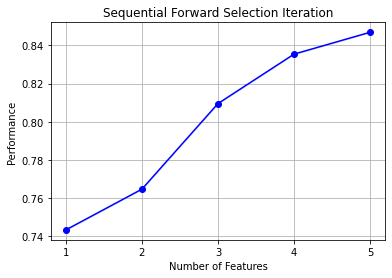

Forward Selection Summary:  ('0', '1', '2', '3', '5')


{1: {'feature_idx': (0,),
  'cv_scores': array([0.74336351]),
  'avg_score': 0.7433635113982007,
  'feature_names': ('0',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.76471061]),
  'avg_score': 0.7647106135416334,
  'feature_names': ('0', '1')},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([0.80956826]),
  'avg_score': 0.8095682582428093,
  'feature_names': ('0', '1', '3')},
 4: {'feature_idx': (0, 1, 3, 5),
  'cv_scores': array([0.83547304]),
  'avg_score': 0.8354730398774002,
  'feature_names': ('0', '1', '3', '5')},
 5: {'feature_idx': (0, 1, 2, 3, 5),
  'cv_scores': array([0.84692791]),
  'avg_score': 0.8469279136358014,
  'feature_names': ('0', '1', '2', '3', '5')}}

In [8]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

x = predictors.values
y = fitness['Oxygen_Consumption'].values

# Forward Selection
fs = SFS(LinearRegression(),        
        k_features=5,
        forward=True,
        floating=False,
        scoring = 'r2',
        cv = 0)
fs.fit(x,y)
# fs.subsets_

fig1 = plot_sfs(fs.get_metric_dict())

plt.title('Sequential Forward Selection Iteration')
plt.grid()
plt.show()
print("Forward Selection Summary: ", fs.k_feature_names_)
fs.subsets_

C:\Users\Training\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Training\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


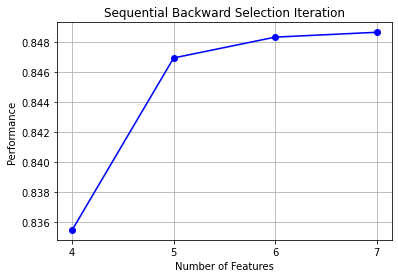

Backward Selection Summary:  ('0', '1', '3', '5')


{7: {'feature_idx': (0, 1, 2, 3, 4, 5, 6),
  'cv_scores': array([0.84863763]),
  'avg_score': 0.8486376319220914,
  'feature_names': ('0', '1', '2', '3', '4', '5', '6')},
 6: {'feature_idx': (0, 1, 2, 3, 5, 6),
  'cv_scores': array([0.84831375]),
  'avg_score': 0.8483137453140754,
  'feature_names': ('0', '1', '2', '3', '5', '6')},
 5: {'feature_idx': (0, 1, 2, 3, 5),
  'cv_scores': array([0.84692791]),
  'avg_score': 0.8469279136358014,
  'feature_names': ('0', '1', '2', '3', '5')},
 4: {'feature_idx': (0, 1, 3, 5),
  'cv_scores': array([0.83547304]),
  'avg_score': 0.8354730398774002,
  'feature_names': ('0', '1', '3', '5')}}

In [9]:
# Backward Selection
bs = SFS(LinearRegression(),        
        k_features=4,
        forward=False,
        floating=False,
        scoring = 'r2',
        cv = 0)
bs.fit(x,y)

fig1 = plot_sfs(bs.get_metric_dict())

plt.title('Sequential Backward Selection Iteration')
plt.grid()
plt.show()
print("Backward Selection Summary: ", bs.k_feature_names_)
bs.subsets_          

C:\Users\Training\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Training\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


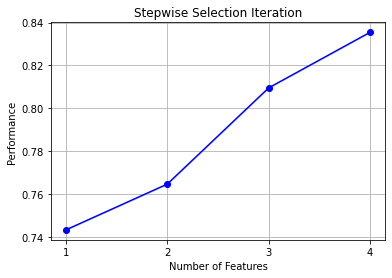

Stepwise Selection Summary:  ('0', '1', '3', '5')


{1: {'feature_idx': (0,),
  'cv_scores': array([0.74336351]),
  'avg_score': 0.7433635113982007,
  'feature_names': ('0',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.76471061]),
  'avg_score': 0.7647106135416334,
  'feature_names': ('0', '1')},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([0.80956826]),
  'avg_score': 0.8095682582428093,
  'feature_names': ('0', '1', '3')},
 4: {'feature_idx': (0, 1, 3, 5),
  'cv_scores': array([0.83547304]),
  'avg_score': 0.8354730398774002,
  'feature_names': ('0', '1', '3', '5')}}

In [10]:
# Stepwise Selection
ss =SFS(LinearRegression(),        
        k_features=4,
        forward=True,
        floating=True,
        scoring = 'r2',
        cv = 0)
ss.fit(x,y)

fig1 = plot_sfs(ss.get_metric_dict())

plt.title('Stepwise Selection Iteration')
plt.grid()
plt.show()
print("Stepwise Selection Summary: ", ss.k_feature_names_)
ss.subsets_

In [11]:
fs_df = pd.DataFrame.from_dict(fs.get_metric_dict()).T
fs_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)",[0.7433635113982007],0.743364,"(0,)",NaN,0.0,NaN
2,"(0, 1)",[0.7647106135416334],0.764711,"(0, 1)",NaN,0.0,NaN
3,"(0, 1, 3)",[0.8095682582428093],0.809568,"(0, 1, 3)",NaN,0.0,NaN
4,"(0, 1, 3, 5)",[0.8354730398774002],0.835473,"(0, 1, 3, 5)",NaN,0.0,NaN
5,"(0, 1, 2, 3, 5)",[0.8469279136358014],0.846928,"(0, 1, 2, 3, 5)",NaN,0.0,NaN
